In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [10]:
data = scipy.io.loadmat('model_id/test2a3.mat')
resp = data['resp']
u_ws = data['u_ws']
resp.shape

(30, 10000, 5)

In [83]:
Ts = 0.001

theta_1 = resp[:,:, 2]
theta_2 = resp[:,:, 1]
x1 = resp[:,:, 4]
x2 = resp[:,:, 3]

x1_dot = np.diff(x1, axis=1)/Ts
x2_dot = np.diff(x2, axis=1)/Ts
theta_1_dot = np.diff(theta_1, axis=1)/Ts
theta_2_dot = np.diff(theta_2, axis=1)/Ts

x1 = x1[:, :-1] + x1_dot*Ts/2
x2 = x2[:, :-1] + x2_dot*Ts/2
theta_1 = theta_1[:, :-1] + theta_1_dot*Ts/2
theta_2 = theta_2[:, :-1] + theta_2_dot*Ts/2


sin_theta_1 = np.sin(theta_1)
cos_theta_1 = np.cos(theta_1)
sin_theta_2 = np.sin(theta_2)
cos_theta_2 = np.cos(theta_2)

sincos_theta_1 = sin_theta_1*cos_theta_1
sincos_theta_2 = sin_theta_2*cos_theta_2

us = np.zeros(x1.shape)
for i, w in enumerate(u_ws.flatten()):
    us[i, :] = 3*np.sin(w*(resp[i, :-1, 0]+Ts/2))

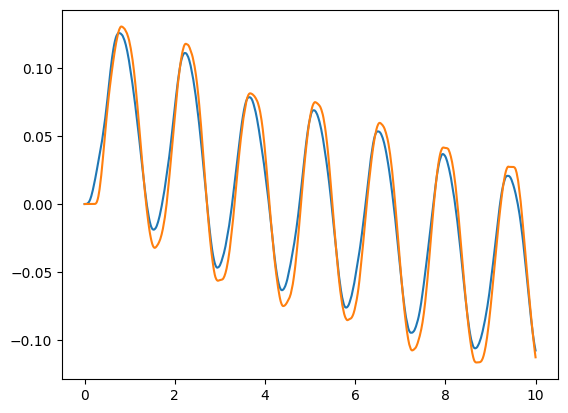

In [94]:
t = resp[0, :-1, 0] + Ts/2
#plt.plot(t, us[20])
plt.plot(t, x1[10])
plt.plot(t, x2[10])

In [62]:
F = np.zeros((x1.shape[0]*(x1.shape[1]-1), 15), dtype=np.float32)
F_prime = np.zeros((x1.shape[0]*(x1.shape[1]-1), 15), dtype=np.float32)

for i in range(x1.shape[0]):
    F[i*(x1.shape[1]-1):(i+1)*(x1.shape[1]-1)] = np.vstack((x1[i, :-1], x2[i, :-1], theta_1[i, :-1], theta_2[i, :-1], 
                                 x1_dot[i, :-1], x2_dot[i, :-1], theta_1_dot[i, :-1], theta_2_dot[i, :-1], 
                                 sin_theta_1[i, :-1], cos_theta_1[i, :-1], sin_theta_2[i, :-1], cos_theta_2[i, :-1],
                                 sincos_theta_1[i, :-1], sincos_theta_2[i, :-1],
                                 us[i, :-1])).T
    F_prime[i*(x1.shape[1]-1):(i+1)*(x1.shape[1]-1)] = np.vstack((x1[i, 1:], x2[i, 1:], theta_1[i, 1:], theta_2[i, 1:], 
                                             x1_dot[i, 1:], x2_dot[i, 1:], theta_1_dot[i, 1:], theta_2_dot[i, 1:], 
                                             sin_theta_1[i, 1:], cos_theta_1[i, 1:], sin_theta_2[i, 1:], cos_theta_2[i, 1:],
                                             sincos_theta_1[i, 1:], sincos_theta_2[i, 1:],
                                             us[i, 1:])).T


In [70]:
np.max(F[1:]-F_prime[:-1])

np.float32(6.1538463)

In [73]:
C = np.linalg.pinv(F) @ F_prime
A = np.round((C-np.eye(15))/Ts, 5)
print(A.T[0:8])

[[-2.05040000e-01  2.41950000e-01  4.20600000e-02  1.96300000e-02
   8.88890000e-01  1.51800000e-02 -8.40000000e-04  8.20000000e-04
  -7.11100000e-02 -8.60000000e-04 -2.94300000e-02 -1.28000000e-03
   4.15400000e-02  6.00000000e-04  1.04800000e-02]
 [ 1.50550000e-01 -1.21710000e-01  3.00000000e-03 -4.34300000e-02
  -3.95300000e-02  9.83440000e-01 -4.40000000e-04  2.50000000e-04
  -8.36000000e-03 -7.10000000e-04  6.50400000e-02 -9.10000000e-04
   1.19900000e-02 -3.09100000e-02  4.12000000e-03]
 [ 2.17760000e+00 -2.12796000e+00 -3.53277000e+00 -4.83613000e+00
  -7.26770000e-01  5.37900000e-01  7.52690000e-01  1.20510000e-01
   4.51068000e+00  1.78500000e-02  5.85195000e+00 -1.89400000e-02
  -5.66830000e-01 -1.68953000e+00 -2.67000000e-03]
 [ 7.80880000e-01 -8.18690000e-01 -3.44231000e+00  1.03073100e+01
   8.11230000e-01 -7.07470000e-01  1.24330000e-01  7.86920000e-01
   6.75759000e+00 -2.66000000e-03 -1.52411400e+01  6.24000000e-03
  -2.45781000e+00  4.51461000e+00 -2.49000000e-02]
 [-4